# 8. Neural networks and deep learning


This week, we´ll learn about neural nets and build a model for classifying images of clothes.


## 8.1 Fashion classification


Dataset:

- Full: [https://github.com/alexeygrigorev/clothing-dataset](https://github.com/alexeygrigorev/clothing-dataset)
- Small: [https://github.com/alexeygrigorev/clothing-dataset-small](https://github.com/alexeygrigorev/clothing-dataset-small)

Links:

- [https://cs231n.github.com](https://cs231n.github.com)


In [1]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.1b SaturnCloud


Link:
[https://bit.ly/saturn-mlzoomcamp](https://bit.ly/saturn-mlzoomcamp)

- **Register**
- **Secrets** -> New -> add private key and secrets
- in terminal:

```bash
cd ~/.ssh
ls
```

- copy the private key as value
- add new line at the end
- **Resources** -> TensorFlow template -> create
- **Edit** -> pip install scipy and save
- add secret file to the project
- change file path to `/home/jovyan/.ssh/default`
- clone data from github


## 8.2 TensorFlow and Keras


- Installing TensorFlow
- Loading images


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# !pip install tensorflow

In [4]:
# !conda install tensorflow -y

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.14.0'

In [84]:
!conda list | grep "keras"

keras                     2.14.0             pyhd8ed1ab_0    conda-forge
keras-image-helper        0.0.1                    pypi_0    pypi


In [8]:
from keras.preprocessing.image import load_img

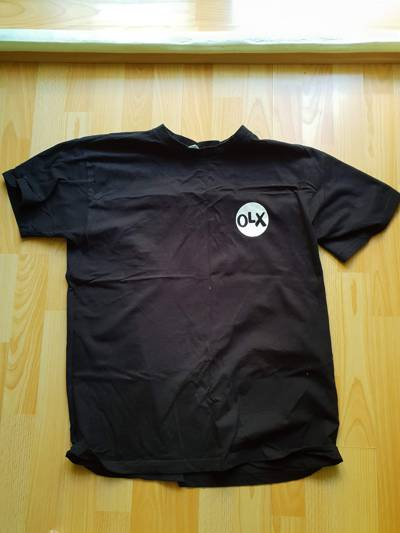

In [9]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = f"{path}/{name}"
load_img(fullname)

You can adjust the target_size parameter to resize the images to a different size. The default is (256, 256).

In [10]:
img = load_img(fullname, target_size=(299, 299))

In [11]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1766561D0>


In [12]:
x = np.array(img)
x.shape

(299, 299, 3)

This was the code to turn image into a numpy array.

## 8.3 Pre-trained convolutional neural networks


- Imagenet dataset: [http://www.image-net.org](http://www.image-net.org)
- Pre-trained models: [https://keras.io/applications](https://keras.io/applications)


In [13]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

In [14]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2024-12-03 23:18:44.790148: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-03 23:18:44.790239: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-03 23:18:44.790257: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-03 23:18:44.790350: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-03 23:18:44.790448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
X = np.array([x])

In [16]:
X = preprocess_input(X)

In [17]:
pred = model.predict(X)

2024-12-03 23:18:47.173480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


In [18]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6819639),
  ('n02916936', 'bulletproof_vest', 0.038139883),
  ('n04370456', 'sweatshirt', 0.034324754),
  ('n03710637', 'maillot', 0.011354211),
  ('n04525038', 'velvet', 0.001845357)]]

Imagenet has no categorie for t-shirt. 🤨
We need to train a different model with the classes we have, but we can use the pre-trained model.


## 8.4 Convolutional neural networks


- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: [https://cs231n.github.io/](https://cs231n.github.io/)


## 8.5 Transfer learning


- Reading the data with `ImageDataGenerator`
- Train `Xception` on smaller images (150x150)

(Better to run with a GPU)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

Found 3068 images belonging to 10 classes.


In [22]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [23]:
# print only folder names in bash
!ls ./clothing-dataset-small/train

dress      longsleeve pants      shoes      skirt
hat        outwear    shirt      shorts     t-shirt


In [24]:
X, y = next(train_ds)

In [25]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


In [27]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 1s 916ms/step


In [30]:
learning_rate = 0.001
optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [31]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 24s 237ms/step - loss: 0.5278 - accuracy: 0.8214 - val_loss: 0.5948 - val_accuracy: 0.8006
Epoch 2/10
96/96 [==============================] - 22s 227ms/step - loss: 0.4228 - accuracy: 0.8644 - val_loss: 0.5605 - val_accuracy: 0.8152
Epoch 3/10
96/96 [==============================] - 22s 228ms/step - loss: 0.3566 - accuracy: 0.8944 - val_loss: 0.5446 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 23s 236ms/step - loss: 0.3119 - accuracy: 0.9048 - val_loss: 0.5435 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 22s 232ms/step - loss: 0.2708 - accuracy: 0.9257 - val_loss: 0.5333 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 22s 226ms/step - loss: 0.2415 - accuracy: 0.9394 - val_loss: 0.5390 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 22s 227ms/step - loss: 0.2144 - accuracy: 0.9485 - val_loss: 0.5253 - val_accuracy: 0.8240

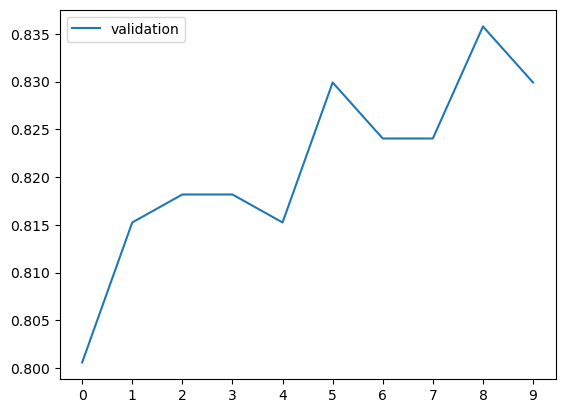

In [32]:
# plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xticks(np.arange(10))
plt.legend()
plt.show();

## 8.6 Adjusting the learning rate


- What´s the learning rate?
- Trying different values


In [33]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [34]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Training model with lr={lr}")

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

Training model with lr=0.0001
Epoch 1/10
96/96 [==============================] - 25s 242ms/step - loss: 1.8855 - accuracy: 0.3696 - val_loss: 1.5145 - val_accuracy: 0.5220
Epoch 2/10
96/96 [==============================] - 22s 226ms/step - loss: 1.3536 - accuracy: 0.5704 - val_loss: 1.1720 - val_accuracy: 0.6246
Epoch 3/10
96/96 [==============================] - 22s 229ms/step - loss: 1.1167 - accuracy: 0.6522 - val_loss: 0.9995 - val_accuracy: 0.6862
Epoch 4/10
96/96 [==============================] - 21s 223ms/step - loss: 0.9823 - accuracy: 0.6868 - val_loss: 0.8940 - val_accuracy: 0.7331
Epoch 5/10
96/96 [==============================] - 21s 221ms/step - loss: 0.8937 - accuracy: 0.7132 - val_loss: 0.8250 - val_accuracy: 0.7449
Epoch 6/10
96/96 [==============================] - 21s 220ms/step - loss: 0.8292 - accuracy: 0.7337 - val_loss: 0.7778 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 21s 223ms/step - loss: 0.7792 - accuracy: 0.7461 - val_loss:

Cell runtime without MPU:   51:23 min:sec

Cell runtime with MPU:      14:40 min:sec

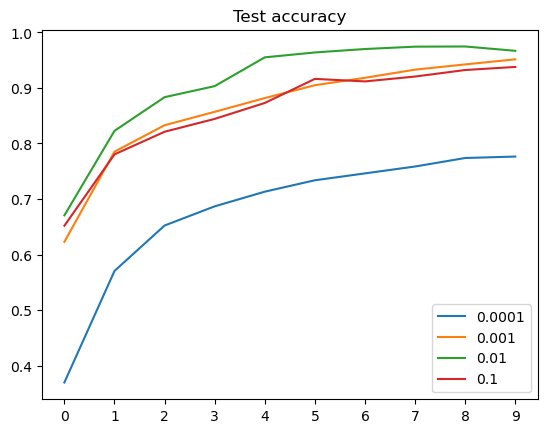

In [35]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)

plt.xticks(np.arange(10))
plt.title("Test accuracy")
plt.legend()
plt.show();

In [36]:
del scores[0.1]
del scores[0.0001]

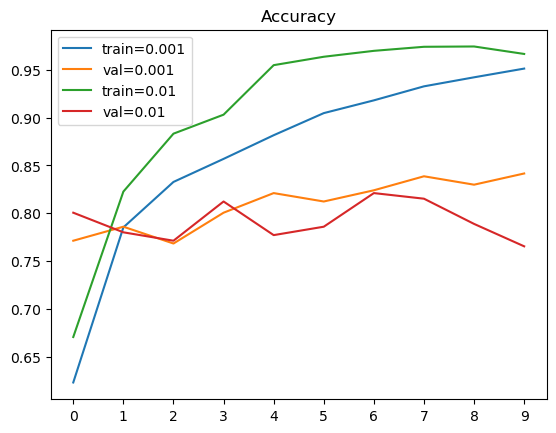

In [37]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % lr))
    plt.plot(hist["val_accuracy"], label=("val=%s" % lr))

plt.xticks(np.arange(10))
plt.title("Accuracy")
plt.legend()
plt.show();

Best learning rate: 0.001

In [38]:
learning_rate = 0.001

## 8.7 Checkpointing


- Saving the best model only
- Training a model with callbacks


In [39]:
model.save_weights("./models/model_v1.h5", save_format="h5")

In [40]:
# "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5".format(epoch=3, val_accuracy=0.84)

In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    save_format="h5",
)

In [43]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0884 - accuracy: 0.6379

/opt/homebrew/Caskroom/miniforge/base/envs/FashionClassification/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 24s 232ms/step - loss: 1.0884 - accuracy: 0.6379 - val_loss: 0.7019 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 22s 224ms/step - loss: 0.6241 - accuracy: 0.7898 - val_loss: 0.6173 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 21s 220ms/step - loss: 0.5003 - accuracy: 0.8354 - val_loss: 0.5911 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 21s 219ms/step - loss: 0.4224 - accuracy: 0.8673 - val_loss: 0.5336 - val_accuracy: 0.8270
Epoch 5/10
96/96 [==============================] - 21s 219ms/step - loss: 0.3660 - accuracy: 0.8902 - val_loss: 0.5481 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 21s 222ms/step - loss: 0.3156 - accuracy: 0.9091 - val_loss: 0.5349 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 21s 218ms/step - loss: 0.2825 - accuracy: 0.9263 - val_loss: 0.5291 - val_accuracy: 0.8240
Epoch 8/10

## 8.8 Adding more layers


- Adding one inner dense layer
- Experimenting with different sizes of inner layer


In [44]:
def make_model(learning_rate=0.01, size_inner=10):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model


In [45]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"Training model with extra inner layer with size of = {size}")

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

Training model with extra inner layer with size of = 10
Epoch 1/10
96/96 [==============================] - 25s 239ms/step - loss: 1.3823 - accuracy: 0.5603 - val_loss: 1.0152 - val_accuracy: 0.6804
Epoch 2/10
96/96 [==============================] - 23s 236ms/step - loss: 0.8656 - accuracy: 0.7106 - val_loss: 0.8227 - val_accuracy: 0.7449
Epoch 3/10
96/96 [==============================] - 21s 222ms/step - loss: 0.7035 - accuracy: 0.7647 - val_loss: 0.7495 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 23s 242ms/step - loss: 0.6087 - accuracy: 0.7969 - val_loss: 0.6730 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 21s 222ms/step - loss: 0.5280 - accuracy: 0.8240 - val_loss: 0.6250 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 22s 226ms/step - loss: 0.4583 - accuracy: 0.8462 - val_loss: 0.6187 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 22s 227ms/step - loss: 0.4015 - ac

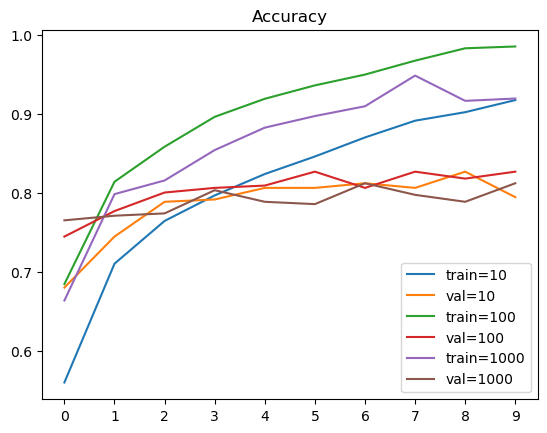

In [46]:
for size, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % size))
    plt.plot(hist["val_accuracy"], label=("val=%s" % size))

plt.xticks(np.arange(10))
plt.title("Accuracy")
plt.legend()
plt.show();

## 8.9 Regularization and dropout


- Regularization by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values


In [47]:
def make_model(learning_rate=0.01, size_inner=10, droprate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [48]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f"Training model with droprate of = {droprate}")

    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

Training model with droprate of = 0.0
Epoch 1/30
96/96 [==============================] - 25s 237ms/step - loss: 1.0260 - accuracy: 0.6613 - val_loss: 0.6315 - val_accuracy: 0.8094
Epoch 2/30
96/96 [==============================] - 21s 219ms/step - loss: 0.5666 - accuracy: 0.8015 - val_loss: 0.5874 - val_accuracy: 0.7977
Epoch 3/30
96/96 [==============================] - 22s 233ms/step - loss: 0.4191 - accuracy: 0.8559 - val_loss: 0.5845 - val_accuracy: 0.8065
Epoch 4/30
96/96 [==============================] - 22s 231ms/step - loss: 0.3311 - accuracy: 0.8885 - val_loss: 0.5771 - val_accuracy: 0.8152
Epoch 5/30
96/96 [==============================] - 22s 226ms/step - loss: 0.2555 - accuracy: 0.9211 - val_loss: 0.5621 - val_accuracy: 0.8270
Epoch 6/30
96/96 [==============================] - 22s 225ms/step - loss: 0.2120 - accuracy: 0.9361 - val_loss: 0.5711 - val_accuracy: 0.8123
Epoch 7/30
96/96 [==============================] - 21s 221ms/step - loss: 0.1683 - accuracy: 0.9505 - v

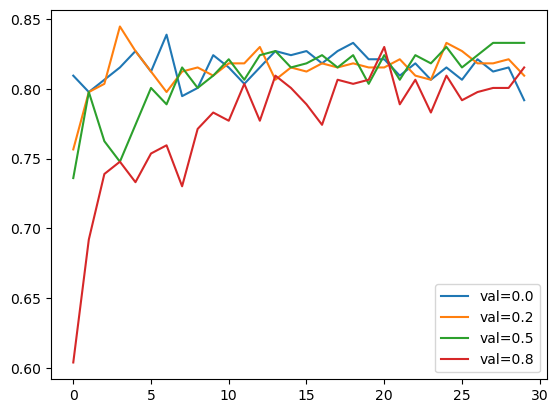

In [49]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

plt.legend()
plt.show();

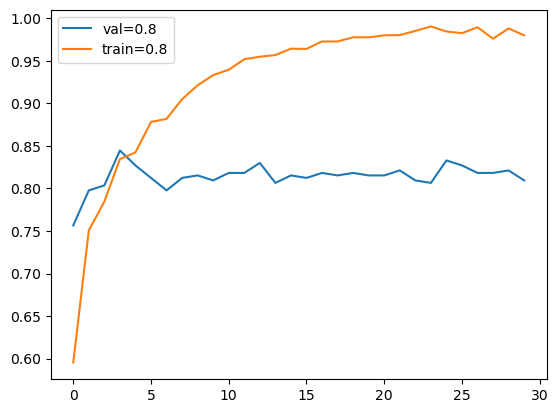

In [50]:
hist = scores[0.2]
plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))
plt.plot(hist["accuracy"], label=("train=%s" % droprate))
plt.legend()
plt.show();

dropout: 0.2 seems to be the best value after ca. 5 epochs

## 8.10 Data augmentation


- Different data augmentations
- Training a model with augmentation
- How to select data augmentation?


In [51]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [52]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate,
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 26s 252ms/step - loss: 1.5947 - accuracy: 0.5192 - val_loss: 0.8516 - val_accuracy: 0.7243
Epoch 2/50
96/96 [==============================] - 22s 232ms/step - loss: 1.1073 - accuracy: 0.6463 - val_loss: 0.7231 - val_accuracy: 0.7449
Epoch 3/50
96/96 [==============================] - 21s 222ms/step - loss: 0.9571 - accuracy: 0.6930 - val_loss: 0.7083 - val_accuracy: 0.7683
Epoch 4/50
96/96 [==============================] - 22s 227ms/step - loss: 0.8778 - accuracy: 0.7243 - val_loss: 0.6923 - val_accuracy: 0.7742
Epoch 5/50
96/96 [==============================] - 21s 222ms/step - loss: 0.8345 - accuracy: 0.7181 - val_loss: 0.6810 - val_accuracy: 0.7918
Epoch 6/50
96/96 [==============================] - 22s 224ms/step - loss: 0.7645 - accuracy: 0.7520 - val_loss: 0.6791 - val_accuracy: 0.7977
Epoch 7/50
96/96 [==============================] - 21s 222ms/step - loss: 0.7521 - accuracy: 0.7454 - val_loss: 0.7923 - val_accuracy: 0.7478

In [53]:
hist = history.history
plt.plot(hist["val_accuracy"], label="val")
plt.plot(hist["accuracy"], label="train")

plt.legend();

Choosing Augmentation:
- Use your own judgement
- Look at the dataset, what kind of variations are there?
  - Are the objects always centered?
    - rotate, shift
- Tune as a hyperparameter
  - train it for 10 - 20 epochs
  - Is it better?
    - Yes: use
    - No: don´t use
    - Same: train for more epochs (20) and evaluate again

Check tensorflow data, to speed up the process.

## 8.11 Training a larger model


- Train a 299x299 model


In [54]:
def make_model(input_size=150, learning_rate=0.01, size_inner=10, droprate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [55]:
input_size = 299

In [56]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32,
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [57]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [58]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate,
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 89s 902ms/step - loss: 1.1470 - accuracy: 0.6183 - val_loss: 0.5472 - val_accuracy: 0.8270
Epoch 2/50
96/96 [==============================] - 86s 883ms/step - loss: 0.6849 - accuracy: 0.7722 - val_loss: 0.4672 - val_accuracy: 0.8299
Epoch 3/50
96/96 [==============================] - 87s 900ms/step - loss: 0.5911 - accuracy: 0.7920 - val_loss: 0.4381 - val_accuracy: 0.8475
Epoch 4/50
96/96 [==============================] - 89s 916ms/step - loss: 0.5430 - accuracy: 0.8207 - val_loss: 0.4264 - val_accuracy: 0.8475
Epoch 5/50
96/96 [==============================] - 87s 901ms/step - loss: 0.4928 - accuracy: 0.8321 - val_loss: 0.4471 - val_accuracy: 0.8416
Epoch 6/50
96/96 [==============================] - 88s 900ms/step - loss: 0.4422 - accuracy: 0.8507 - val_loss: 0.4291 - val_accuracy: 0.8592
Epoch 7/50
96/96 [==============================] - 86s 884ms/step - loss: 0.4291 - accuracy: 0.8494 - val_loss: 0.4367 - val_accuracy: 0.8680

## 8.12 Using the model


- Loading the model
- Evaluating the model
- Getting predictions


In [59]:
import tensorflow as tf
from tensorflow import keras

In [71]:
keras.models.load_model("./models/xception_v4_17_0.871.h5")

In [72]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.xception import preprocess_input

In [73]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./clothing-dataset-small/test",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False,
)

Found 372 images belonging to 10 classes.


In [74]:
model.evaluate(test_ds)

12/12 [==============================] - 11s 794ms/step - loss: 0.2969 - accuracy: 0.9005


[0.2969287633895874, 0.9005376100540161]

In [75]:
path = "clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg"

img = load_img(path, target_size=(299, 299))

In [76]:
import numpy as np

In [77]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [78]:
X = preprocess_input(X)

In [79]:
pred = model.predict(X)

1/1 [==============================] - 1s 519ms/step


In [80]:
classes = [
    "dress",
    "hat",
    "longsleeve",
    "outwear",
    "pants",
    "shirt",
    "shoes",
    "shorts",
    "skirt",
    "t-shirt",
]

In [70]:
dict(zip(classes, pred[0]))

{'dress': -6.8165884,
 'hat': -6.5785937,
 'longsleeve': 0.82848614,
 'outwear': -0.03710188,
 'pants': 16.319511,
 'shirt': -1.7572967,
 'shoes': -6.6892056,
 'shorts': 8.445179,
 'skirt': -1.2200444,
 't-shirt': -4.13998}

You can apply softmax to the predictions to get class.

## 8.13 Summary


- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trains. Fast learners aren´t always best ones
- We can save the best model using callbacks and checkpoints
- To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumenations - another way of generating augmentations
- Use PyTorch or MXNet, MLX (Apple) instead of TensorFlow/Keras
- In addition to Xception, there are other architectures - try them

Other projects:
- cats vs dogs
- Hotdog vs not hotdog
- Category of images

Found intersting dataset:
